In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the directories
no_ins_dir = 'no_ins'
with_ins_dir = 'with_ins'

# Function to read all CSV files in a directory into a dictionary of DataFrames
def read_csvs_in_dir_to_dict(directory):
    dfs = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            df = pd.read_csv(os.path.join(directory, filename))
            dfs[filename] = df
    return dfs

# Read the CSV files
no_ins_dfs = read_csvs_in_dir_to_dict(no_ins_dir)
with_ins_dfs = read_csvs_in_dir_to_dict(with_ins_dir)

# Combine the dictionaries
dfs = {**no_ins_dfs, **with_ins_dfs}

In [3]:
with_ins_dfs['Damian_with_intro.csv'].head(25)

,acc,accept_status,accuracy,average_response_time,avg_rt,background,canvas_backend,checkbox_status,correct,correct_consent_sketchpad,...,time_response_logger,time_schooling_level_form,time_schooling_logger,time_security_feature_logger,time_welcome,title,total_correct,total_response_time,total_responses,width
0,undefined,NaN,undefined,undefined,undefined,#3d3846,psycho,NaN,undefined,undefined,...,NaN,NaN,NaN,NaN,NaN,New experiment,0,0.000000,0,1024
1,undefined,NaN,undefined,undefined,undefined,#3d3846,psycho,NaN,undefined,undefined,...,NaN,NaN,56292.136908,NaN,NaN,New experiment,0,0.000000,0,1024
2,undefined,NaN,undefined,undefined,undefined,#3d3846,psycho,NaN,undefined,undefined,...,NaN,NaN,56292.136908,NaN,NaN,New experiment,0,0.000000,0,1024
3,undefined,NaN,undefined,undefined,undefined,#3d3846,psycho,NaN,undefined,undefined,...,NaN,NaN,56292.136908,NaN,NaN,New experiment,0,0.000000,0,1024
4,undefined,NaN,undefined,undefined,undefined,#3d3846,psycho,NaN,undefined,undefined,...,NaN,NaN,56292.136908,NaN,NaN,New experiment,0,0.000000,0,1024
5,100,NaN,100,5673,5673,#3d3846,psycho,NaN,1,undefined,...,260727.250099,NaN,56292.136908,NaN,NaN,New experiment,1,5673.156977,1,1024
6,50,NaN,50,11921,11921,#3d3846,psycho,NaN,0,undefined,...,279591.207981,NaN,56292.136908,NaN,NaN,New experiment,1,23843.494892,2,1024
7,66,NaN,66,10441,10441,#3d3846,psycho,NaN,1,undefined,...,287735.218048,NaN,56292.136908,NaN,NaN,New experiment,2,31323.379993,3,1024
8,75,NaN,75,9427,9427,#3d3846,psycho,NaN,1,undefined,...,294791.209936,NaN,56292.136908,NaN,NaN,New experiment,3,37708.817005,4,1024
9,80,NaN,80,8125,8125,#3d3846,psycho,NaN,1,undefined,...,298375.185013,NaN,56292.136908,NaN,NaN,New experiment,4,40628.305912,5,1024


In [4]:
# Function to process and analyze each DataFrame in a dictionary
def process_and_analyze(dfs):
    for filename, df in dfs.items():
        # Ignore the first 5 rows and make a copy
        df = df[5:].copy()
        df['correct'] = df['correct'].astype(int)
        
        # Calculate the ratio of correct answers
        if 'correct' in df.columns:
            ratio_correct = df['correct'].sum() / df.shape[0]
            print(f"For participant {filename}, the ratio of correct answers was {ratio_correct*100:.2f}%.")
        else:
            print(f"The DataFrame for participant {filename} does not contain a 'correct' column.")

# Process and analyze the DataFrames
process_and_analyze(no_ins_dfs)
process_and_analyze(with_ins_dfs)


For participant subject-22_without.csv, the ratio of correct answers was 69.64%.
For participant subject-10.csv, the ratio of correct answers was 55.36%.
For participant subject-51.csv, the ratio of correct answers was 62.50%.
For participant Damian_with_intro.csv, the ratio of correct answers was 69.64%.
For participant lukas_friend_with_intro.csv, the ratio of correct answers was 46.43%.
For participant subject-12_with.csv, the ratio of correct answers was 67.86%.


/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

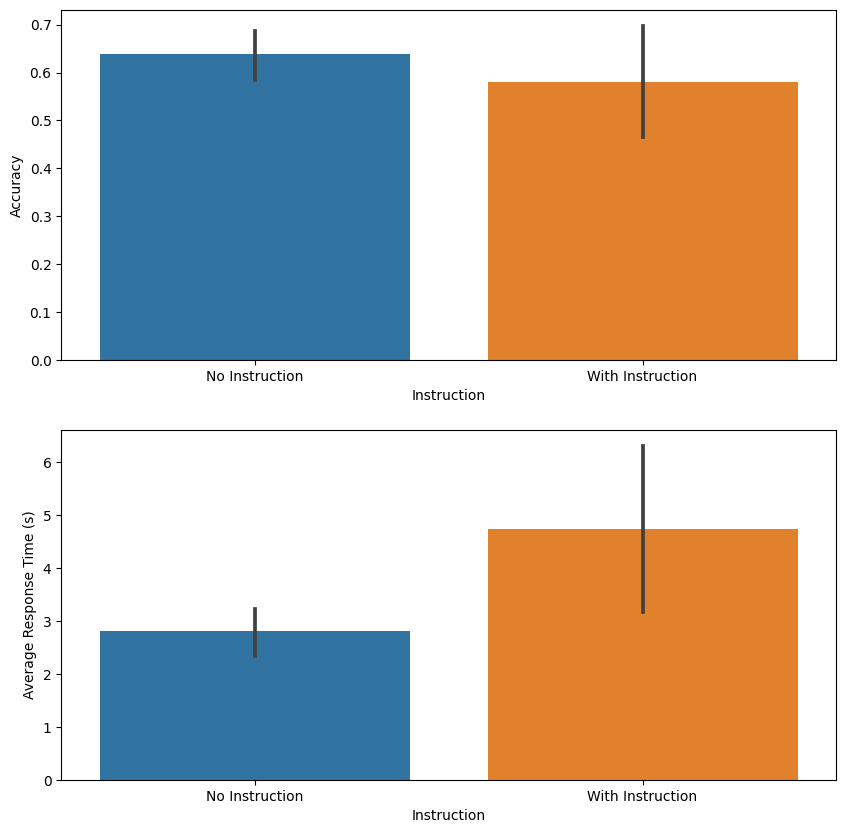

In [8]:
# Assuming that dfs is a dictionary where the key is the filename and the value is the DataFrame for that file
def create_graph(dfs):
    # Create empty lists to store data
    instruction = []
    accuracy = []
    avg_response_time = []
    std_dev = []

    # Process each DataFrame
    for filename, df in dfs.items():
        df=df.copy()[5:]
        # Calculate accuracy and average response time
        acc = df['correct'].astype(int).sum() / df.shape[0]
        avg_time = (df['response_time'] / 1000).mean()  # Convert ms to s before calculating the mean
        std_time = df['response_time'].std()

        # Append data to lists
        instruction.append('With Instruction' if 'with_intro' in filename else 'No Instruction')
        accuracy.append(acc)
        avg_response_time.append(avg_time)
        std_dev.append(std_time)

    # Create a DataFrame from the lists
    plot_df = pd.DataFrame({
        'Instruction': instruction,
        'Accuracy': accuracy,
        'Average Response Time': avg_response_time,
        'Standard Deviation': std_dev
    })

    # Create the plots
    fig, ax =plt.subplots(2,1,figsize=(10, 10))
    sns.barplot(x='Instruction', y='Accuracy', data=plot_df, ax=ax[0])
    sns.barplot(x='Instruction', y='Average Response Time', data=plot_df, ax=ax[1])
    ax[1].set_ylabel('Average Response Time (s)')
    plt.savefig('plot.png')
    plt.show()
    
# Call the function with your dictionary of DataFrames
create_graph(dfs)